# <Font color = 'indianred'>**Specify Project Folder**

In [1]:
# Import the pathlib module to handle file paths in a cross-platform manner.
from pathlib import Path

# Check if the current Python environment is Google Colab, a cloud-based Python development environment.
if 'google.colab' in str(get_ipython()):
    # The code is running in Google Colab, so we need to access files stored in Google Drive.
    # The google.colab.drive module provides functions to mount your Google Drive within the Colab environment.
    from google.colab import drive
    drive.mount('/content/drive')

    # Define the root directory in Google Drive to be used for data storage.
    # The Path() function from pathlib creates a new path object.
    base_folder = Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data')

    # Google Colab may not have all the necessary Python packages installed.
    # Install or update the fastdownload, fastai, fastcore, and kaggle packages using pip.
    # The -qq flag ensures the installation process is less verbose.
    !pip install fastdownload -qq
    !pip install fastai -U -qq
    !pip install fastcore -U -qq
    !pip install kaggle -U -qq
else:
    # The code is running locally, not in Google Colab.
    # Set the root directory to a specific local path on the machine.
    project_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data')
    data_folder = Path('/home/harpreet/data')

Mounted at /content/drive


# <Font color = 'indianred'>**Import Libraries**

In [2]:
# Import get_image_files and PILImage from fastai for image file handling and manipulation
from fastai.vision.all import get_image_files, PILImage

# Import parallel from fastcore for parallel computation
from fastcore.parallel import parallel

# Import NumPy for numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import Dataset from PyTorch for creating custom datasets
from torch.utils.data import Dataset

# Import os for interacting with the operating system
import os

# Import torchvision for computer vision tasks
import torchvision

# Import tarfile for extracting and creating tarball files
import tarfile

# Import PyTorch for machine learning tasks
import torch

# Import Counter from collections for counting hashable objects
from collections import Counter


# <Font color = 'indianred'>**Setup Kaggle API**

In [3]:
# Set the path for the Kaggle API credentials stored in the '.kaggle' folder within the project folder
kaggle_api = base_folder/'.kaggle'

In [4]:
# Create the '.kaggle' directory if it doesn't exist; also create any necessary parent directories
kaggle_api.mkdir(exist_ok=True, parents=True)

In [5]:
str(kaggle_api)

'/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data/.kaggle'

- To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com.
- Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials.
- Place this file in the folder we created above.

In [6]:
# List all files and directories in the '.kaggle' folder, showing detailed information
!ls -la {str(kaggle_api)}

total 1
-rw------- 1 root root 70 Sep 18 23:18 kaggle.json


This code block executes a shell command to list all files and directories in the `.kaggle` folder.
- The `!` at the beginning of the line tells Jupyter to execute the command in the system shell instead of in Python.
- The `{}` is used for string formatting and allows you to insert variables or expressions into a string. In this case, the `{str(kaggle_api)}` part is a formatted string that inserts the path to the `.kaggle` folder, which is stored in the `kaggle_api` variable.
- The `str()` function is used to convert the `Path` object to a string so that it can be inserted into the formatted string.
- The `-la` flags passed to the `ls` command tell it to show detailed information about each file and directory, including permissions, owner, size, and modification time. This command is useful for checking the contents of the `.kaggle` folder to ensure that the Kaggle API credentials are set up correctly.

In [7]:
# Set the environment variable 'KAGGLE_CONFIG_DIR' to the path of '.kaggle' folder for Kaggle API authentication
os.environ['KAGGLE_CONFIG_DIR'] = str(kaggle_api)

This code block sets the `KAGGLE_CONFIG_DIR` environment variable to the path of the `.kaggle` folder, which is stored in the `kaggle_api` variable. The `os.environ` dictionary provides access to the environment variables in the current process. The `['KAGGLE_CONFIG_DIR']` key is used to access the `KAGGLE_CONFIG_DIR` environment variable, and the `=` operator is used to set its value to the path of the `.kaggle` folder. This environment variable is used by the Kaggle API client to locate the Kaggle API credentials file, which is stored in the `.kaggle` folder. By setting this environment variable, we ensure that the Kaggle API client can access the credentials file and authenticate with the Kaggle API.

In [8]:
# Set read and write permissions for the owner on the 'kaggle.json' file for secure API access
!chmod 600 {str(kaggle_api/'kaggle.json')}

- This code block sets the file permissions of the `kaggle.json` file to `600`.
- The `!` at the beginning of the line tells Jupyter to execute the command in the system shell instead of in Python. The `{str(kaggle_api/'kaggle.json')}` part is a formatted string that inserts the path to the `kaggle.json` file, which is stored in the `kaggle_api` variable. The `chmod` command is used to change the file permissions of the `kaggle.json` file.
- The `600` argument passed to the `chmod` command sets the file permissions to `rw-------`, which means that the owner of the file has read and write permissions, and no other users have any permissions.
- This command is useful for securing the Kaggle API credentials file and ensuring that only the owner of the file can access it.

In [9]:
!ls -la {str(kaggle_api/'kaggle.json')}

-rw------- 1 root root 70 Sep 18 23:18 /content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data/.kaggle/kaggle.json


In [10]:
# Import the Kaggle API client to interact with Kaggle datasets and competitions
# The import should be done after setting the environment variable
from kaggle import api

In [16]:
data_folder = Path('/content')

# <Font color = 'indianred'>**Datasets with SubFolders as Class Labels**

## <Font color = 'indianred'>**Download Compressed files**

In [17]:
# Import FastDownload for optimized, parallel downloading of files
from fastdownload import FastDownload

In [18]:
# Initialize FastDownload object with specified base folder, archive folder
#  for storing compressed files, and data folder for extracted datasets
d = FastDownload(base=data_folder, archive='archive', data='datasets')


Initialize an object d of the FastDownload class with parameters specifying the base, archive, and data directories.
Key Components:
- base: Presumably the base directory where the downloaded files will be stored.
- archive: A directory within base where archived files are stored.
- data: A directory within base containing the actual data sets.

In [19]:
# Define the URL for the Imagenette dataset
url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz'

# Download the Imagenette dataset using FastDownload and store it in the specified data folder
data_folder_imagenette = d.get(url)


In [20]:
data_folder_imagenette

Path('/content/datasets/imagenette2')

## <Font color = 'indianred'>**Check folders downloaded**

In [21]:
# we will use rglob which will help us to specify the pattern to search
# ** - Recursively matches zero or more directories that fall under the current directory.

for entries in (data_folder/'datasets/imagenette2').rglob('**'):
    print(entries)

/content/datasets/imagenette2
/content/datasets/imagenette2/train
/content/datasets/imagenette2/train/n03417042
/content/datasets/imagenette2/train/n01440764
/content/datasets/imagenette2/train/n03888257
/content/datasets/imagenette2/train/n03028079
/content/datasets/imagenette2/train/n03394916
/content/datasets/imagenette2/train/n03000684
/content/datasets/imagenette2/train/n03425413
/content/datasets/imagenette2/train/n02102040
/content/datasets/imagenette2/train/n03445777
/content/datasets/imagenette2/train/n02979186
/content/datasets/imagenette2/val
/content/datasets/imagenette2/val/n03417042
/content/datasets/imagenette2/val/n01440764
/content/datasets/imagenette2/val/n03888257
/content/datasets/imagenette2/val/n03028079
/content/datasets/imagenette2/val/n03394916
/content/datasets/imagenette2/val/n03000684
/content/datasets/imagenette2/val/n03425413
/content/datasets/imagenette2/val/n02102040
/content/datasets/imagenette2/val/n03445777
/content/datasets/imagenette2/val/n02979186


Sure, here's an explanation of the code block:





This code block uses the `rglob()` method to recursively iterate over all files and directories in the `imagenette2` dataset directory. The `rglob()` method is a recursive version of the `glob()` method, which is used to find all files and directories that match a specified pattern.

The `rglob('**')` part of the code specifies that we want to recursively iterate over all files and directories in the `imagenette2` dataset directory. The `**` pattern matches zero or more directories and subdirectories.

In [22]:
# Dictionary to map the 10 classes with intergers
label_dict = {
    'n01440764' : 0,
    'n02102040' : 1,
    'n02979186' : 2,
    'n03000684' : 3,
    'n03028079' : 4,
    'n03394916' : 5,
    'n03417042' : 6,
    'n03425413' : 7,
    'n03445777' : 8,
    'n03888257' : 9
}

# Array to map integral indices with the actual class names
actual_label_dict = [
    'tench',
    'English springer',
    'cassette player',
    'chain saw',
    'church',
    'French horn',
    'garbage truck',
    'gas pump',
    'golf ball',
    'parachute'
]

## <Font color = 'indianred'>**Create Dataset**

In [23]:
# Retrieve all image files from the 'imagenette2' folder inside the 'datasets' directory in the base folder
image_files = get_image_files(data_folder/'datasets/imagenette2')


This code block uses the `get_image_files()` function from the `fastai.vision.all` module to get a list of all image files in the `imagenette2` dataset directory. The `get_image_files()` function is a convenient way to get a list of all image files in a directory and its subdirectories.

In [24]:
image_files

(#13394) [Path('/content/datasets/imagenette2/train/n03417042/n03417042_22064.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_15058.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_5689.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_5877.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_17645.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/ILSVRC2012_val_00007477.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_18329.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_5234.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_3404.JPEG'),Path('/content/datasets/imagenette2/train/n03417042/n03417042_22828.JPEG')...]

(333, 500)


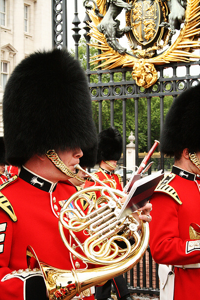

In [25]:
# Generate a random index from the range of total image files (13394 in this case)
index = (np.random.choice(np.arange(13394), 1)).item()

# Create a PILImage object using a randomly selected image file from the 'image_files' list
img = PILImage.create(image_files[index])

# Print the dimensions of the selected image
print(img.size)

# Create and return a thumbnail of the image with a height of 300 pixels
img.to_thumb(h=300)


The given code snippet performs a series of operations related to image manipulation, particularly with the PIL (Python Imaging Library) and NumPy. Below are the primary actions:

1. **Generating Random Index**: It generates a random index from the range `[0, 13393]` to randomly select one image from a list named `image_files`.
    - `np.random.choice(np.arange(13394), 1)` uses NumPy to randomly choose one value from the range `[0, 1, 2, ..., 13393]`.
    - `.item()` extracts this random index as a scalar.    

2. **Create PILImage**: The code creates a PIL Image object based on the file located at the random index in the `image_files` list.
    - `PILImage.create(image_files[index])` utilizes the PIL library to read and create an image object from the file.

3. **Print Image Dimensions**: It prints the dimensions of this image using `img.size`, which likely returns a tuple `(width, height)`.

4. **Generate Thumbnail**: The last line generates a thumbnail version of this image with a height of 300 pixels while maintaining the aspect ratio.
    - `img.to_thumb(h=300)` should return a new PIL Image object that is a resized version of the original.

The purpose of this code is essentially to randomly select an image from a list of image files, inspect its dimensions, and then generate a thumbnail with a specified height. This could be part of a data preprocessing step in a larger pipeline, or perhaps for random sampling and visualization of image data.

Sure, here's the updated code block with a docstring:



In [26]:
def get_img_size(file):
    """
    Returns the size of an image file.

    Parameters:
    file (str or Path): The path to the image file.

    Returns:
    tuple: A tuple containing the width and height of the image.

    """
    return PILImage.create(file).size

This code block defines a function called `get_img_size()` that takes a file path as input and returns the size of the image file as a tuple containing the width and height of the image. The function uses the `PILImage.create()` method to create a `PILImage` object from the image file, and then uses the `size` attribute of the `PILImage` object to get the dimensions of the image.

In [27]:
img_sizes = parallel(get_img_size, image_files, progress=True)

This code block uses the `parallel()` function from the `fastcore` library to apply the `get_img_size()` function to each image file in the `image_files` list in parallel. The `parallel()` function is a convenient way to apply a function to a list of inputs in parallel, which can save a lot of time and effort compared to applying the function to each input sequentially.

The `parallel()` function takes three arguments: the function to apply (`get_img_size`), the list of inputs to apply the function to (`image_files`), and a `progress` argument that specifies whether to display a progress bar during the computation. The `parallel()` function returns a list of outputs, where each output corresponds to the result of applying the function to the corresponding input in the input list.

The `img_sizes` variable is assigned the list of image sizes returned by the `parallel()` function. This variable can be used to iterate over all image sizes in the dataset and perform operations on them, such as checking the distribution of image sizes or resizing the images to a common size for training a machine learning model.


In [28]:
pd.Series(img_sizes).value_counts()

(500, 375)    3134
(500, 333)    1174
(375, 500)    1041
(333, 500)     432
(500, 334)     276
              ... 
(575, 352)       1
(300, 222)       1
(500, 242)       1
(368, 114)       1
(270, 200)       1
Length: 2914, dtype: int64

In [29]:
500/375

1.3333333333333333

In [30]:
200 * 500/375

266.6666666666667

### <Font color = 'indianred'>**Transforms**

In [33]:
from torchvision import transforms

# Define preprocessing transformations for training and testing datasets
data_transforms = {
    "train": transforms.Compose(
        [
            # Resize the shorter side of the image to (500, 375) pixels
            transforms.Resize((500, 375)),
            # Perform a random crop to obtain a 267x200 image
            transforms.RandomCrop((267, 200)),
            # Convert image to PyTorch tensor
            transforms.ToTensor(),
            # Normalize tensor values to range [-1, 1]
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
    "test": transforms.Compose(
        [
            # Resize the shorter side of the image to 640 pixels
            transforms.Resize((500, 375)),
            # Perform a center crop to obtain a 427x427 image
            transforms.CenterCrop((267, 200)),
            # Convert image to PyTorch tensor
            transforms.ToTensor(),
            # Normalize tensor values to range [-1, 1]
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
}


In [34]:
# Create a training dataset from the 'train' folder of the 'imagenette2' dataset, applying the defined 'train' transformations
trainset = torchvision.datasets.ImageFolder(data_folder/'datasets/imagenette2/train', transform=data_transforms['train'])

# Create a test and validation dataset from the 'val' folder of the 'imagenette2' dataset, applying the defined 'test' transformations
test_val_set = torchvision.datasets.ImageFolder(data_folder/'datasets/imagenette2/val', transform=data_transforms['test'])


In [35]:
test_val_set.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [36]:
trainset.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [37]:
len(trainset), len(test_val_set)

(9469, 3925)

## <Font color = 'indianred'>**Create Test/Val Split**

In [38]:
def split_dataset(base_dataset, fraction, seed):
    """
    Splits a given PyTorch Dataset into two parts, according to a specified fraction.

    Parameters:
    base_dataset (torch.utils.data.Dataset): The original dataset to be split.
    fraction (float): The fraction of the dataset to be used for the first split. Should be between 0 and 1.
    seed (int): The random seed for reproducibility.

    Returns:
    tuple: Two PyTorch Datasets obtained by randomly splitting the base dataset.
    """
    # Calculate the size of the first split
    split_a_size = int(fraction * len(base_dataset))
    # Calculate the size of the second split
    split_b_size = len(base_dataset) - split_a_size

    # Perform the split and return
    return torch.utils.data.random_split(
        base_dataset,
        [split_a_size, split_b_size],
        generator=torch.Generator().manual_seed(seed)
    )


The function `split_dataset` is designed to split a PyTorch Dataset into two parts based on a specified fraction and a random seed for reproducibility. Here's a breakdown of its workings:

1. **Function Signature**: It takes three arguments:
    - `base_dataset`: The original PyTorch Dataset to be split.
    - `fraction`: A float between 0 and 1 specifying the fraction of the dataset that goes into the first part.
    - `seed`: An integer used to seed the random number generator for reproducibility.

2. **Calculate Sizes of Splits**:
    - `split_a_size`: The size of the first split is calculated as an integer value of the product of the `fraction` and the total length of the `base_dataset`.
    - `split_b_size`: The remaining portion, calculated as the total length of the dataset minus `split_a_size`.

3. **Random Splitting**:
    - `torch.utils.data.random_split` is then called to split the dataset.
    - It uses `[split_a_size, split_b_size]` to specify the sizes of the two output datasets.
    - A random generator is initialized with the provided `seed` for reproducibility, using `torch.Generator().manual_seed(seed)`.

4. **Return Value**: The function returns a tuple containing the two datasets resulting from the random split.

In summary, the function is a utility for partitioning a PyTorch Dataset into two parts, possibly for creating training and validation sets. The inclusion of a random seed allows for the random but reproducible division of the dataset, which can be important in machine learning experiments.

In [39]:
# Split the 'test_val_set' dataset into two equal parts, one for testing and another for validation, using a seed of 42 for reproducibility
testset, validset = split_dataset(test_val_set, 0.5, 42)


In [40]:
testset[0][0].shape

torch.Size([3, 267, 200])

## <Font color = 'indianred'>**Create DataLoaders**

In [41]:
# Initialize a DataLoader for the training set with batch size of 256 and shuffling enabled
train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

# Initialize a DataLoader for the validation set with batch size of 256 and shuffling disabled
valid_loader = torch.utils.data.DataLoader(validset, batch_size=256, shuffle=False)

# Initialize a DataLoader for the test set with batch size of 256 and shuffling disabled
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)


The primary difference between the three `DataLoader` initializations lies in whether shuffling is enabled or not, specified by the `shuffle` parameter.

1. **Training DataLoader with Shuffling (`shuffle=True`)**:
    - The training dataset is shuffled at the beginning of each epoch.
    - Shuffling is usually desirable during training to ensure that the model does not learn any spurious patterns from the order of the training data.
    - This can also aid in better generalization and help the model converge faster.

2. **Validation and Test DataLoaders with No Shuffling (`shuffle=False`)**:
    - For validation and testing, shuffling is generally not needed.
    - In these cases, you are assessing the model's performance on a fixed set of data, so the order should not matter.
    - Disabling shuffling can also make the evaluation phase slightly faster.
  
In summary, shuffling is typically done for the training set to improve model learning. On the other hand, for validation and testing, where the aim is to evaluate the model's generalization capability, shuffling is usually unnecessary and is hence disabled.

In [42]:
print(len(train_loader), len(valid_loader), len(test_loader))

37 8 8


## <Font color = 'indianred'>**Check Data Loaders**

In [43]:
def check_loader(loader):
    """
    Prints the shape of image and label batches from the DataLoader.

    Parameters:
    loader (torch.utils.data.DataLoader): DataLoader instance containing the dataset.

    Side Effects:
    Prints the batch number, image shape, and label shape for the first three batches in the DataLoader.
    Prints the labels from the last processed batch.
    """
    num_epochs = 1  # Number of epochs to iterate through; set to 1 to check DataLoader

    # Loop through each epoch (only one epoch in this case)
    for epoch in range(num_epochs):
        # Enumerate through the DataLoader, getting the index and (image, label) tuple for each batch
        for idx, (image, label) in enumerate(loader):
            # Limit the check to the first 3 batches
            if idx >= 3:
                break
            # Print batch number, batch size, and shapes of the image and label tensors
            print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape} | y shape: {label.shape}")

    # Print labels from the last processed batch
    print(f"\nLabels from current batch \n {label}")


The `check_loader` function is a utility function designed to inspect the contents of a given PyTorch DataLoader. It provides insight into the batch shapes for both images and labels, specifically for the first three batches. Here's a breakdown of the function's operations:

1. **Set Number of Epochs**: The function sets `num_epochs` to 1. This is simply to loop through the DataLoader once for inspection purposes.

2. **Enumerate through DataLoader**:
    - The function enumerates through the DataLoader, obtaining the index and the `(image, label)` tuple for each batch.
    - The index `idx` is 0-based.

3. **Limit to First 3 Batches**: The enumeration stops after inspecting the first three batches. This is controlled by the condition `if idx >= 3: break`.

4. **Print Batch Information**:
    - For each of the first three batches, it prints out the batch number (1-based), the batch size (the number of samples in the batch), and the shapes of the image and label tensors.
    - The shape of the image tensor is particularly informative as it may contain dimensions for batch size, channels, height, and width (in typical cases).

5. **Print Labels of Last Processed Batch**: Finally, the function prints the labels of the last processed batch, which would be the third batch due to the imposed limit.

This function is useful for debugging or verifying that a DataLoader is working as expected and producing batches in the intended format. Specifically, it confirms that the DataLoader is generating batches with the correct shapes for both the image and label tensors.

In [44]:
check_loader(train_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([6, 2, 0, 9, 9, 5, 1, 2, 8, 2, 0, 0, 3, 6, 0, 9, 4, 3, 4, 6, 6, 1, 5, 7,
        5, 2, 7, 1, 8, 6, 9, 8, 6, 7, 5, 0, 0, 2, 1, 4, 9, 0, 7, 1, 8, 3, 0, 0,
        3, 2, 6, 5, 9, 0, 2, 8, 1, 2, 4, 1, 0, 0, 7, 8, 2, 1, 3, 5, 9, 9, 5, 7,
        7, 8, 5, 4, 4, 8, 1, 7, 1, 0, 3, 2, 0, 8, 4, 9, 7, 1, 9, 8, 6, 5, 3, 8,
        2, 1, 5, 1, 2, 0, 5, 1, 0, 9, 9, 8, 6, 0, 7, 2, 2, 0, 6, 5, 9, 8, 2, 1,
        3, 5, 4, 7, 2, 1, 4, 2, 6, 1, 7, 3, 9, 0, 9, 6, 9, 2, 7, 7, 5, 6, 3, 9,
        5, 8, 6, 9, 8, 2, 0, 9, 6, 4, 4, 6, 1, 8, 3, 5, 0, 7, 4, 1, 4, 0, 2, 5,
        9, 7, 4, 2, 1, 6, 4, 4, 9, 4, 6, 7, 4, 2, 0, 7, 5, 3, 3, 6, 1, 5, 2, 3,
        1, 3,

In [45]:
check_loader(valid_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([1, 0, 1, 2, 7, 2, 8, 5, 7, 5, 7, 5, 9, 3, 3, 9, 7, 1, 0, 1, 3, 6, 3, 5,
        2, 2, 7, 6, 6, 7, 5, 6, 7, 7, 5, 9, 0, 8, 0, 5, 5, 4, 2, 2, 6, 9, 1, 3,
        7, 7, 5, 1, 5, 2, 4, 9, 8, 6, 1, 3, 2, 8, 4, 7, 8, 9, 9, 1, 4, 2, 2, 1,
        4, 0, 5, 4, 5, 1, 5, 4, 1, 4, 4, 2, 3, 1, 8, 7, 6, 6, 8, 1, 6, 8, 3, 0,
        3, 1, 0, 9, 7, 1, 6, 8, 2, 8, 1, 2, 2, 7, 8, 0, 8, 7, 6, 4, 7, 7, 5, 0,
        3, 8, 2, 4, 5, 8, 9, 3, 4, 7, 5, 2, 3, 9, 0, 5, 1, 9, 1, 2, 5, 9, 5, 9,
        5, 2, 5, 0, 6, 7, 4, 1, 3, 7, 3, 9, 9, 0, 5, 2, 3, 2, 4, 6, 5, 4, 0, 9,
        5, 6, 5, 5, 4, 7, 7, 1, 0, 5, 9, 2, 8, 5, 8, 2, 7, 1, 7, 0, 6, 6, 7, 7,
        7, 5,

In [46]:
check_loader(test_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([6, 0, 4, 3, 2, 6, 8, 0, 5, 5, 2, 2, 7, 2, 7, 1, 1, 1, 6, 3, 2, 1, 7, 2,
        9, 3, 2, 9, 2, 6, 6, 6, 5, 8, 7, 0, 1, 3, 6, 3, 8, 3, 9, 0, 7, 7, 1, 5,
        4, 3, 0, 8, 3, 8, 0, 3, 3, 1, 4, 9, 0, 5, 2, 2, 2, 5, 1, 5, 5, 1, 6, 0,
        3, 7, 4, 4, 9, 7, 3, 6, 3, 3, 6, 7, 6, 5, 6, 8, 4, 6, 5, 8, 5, 4, 0, 0,
        6, 3, 6, 9, 8, 2, 5, 0, 1, 3, 6, 7, 6, 4, 0, 9, 5, 8, 3, 9, 7, 8, 4, 5,
        5, 7, 8, 4, 4, 6, 9, 7, 8, 5, 1, 4, 8, 0, 4, 5, 0, 3, 3, 2, 6, 8, 8, 6,
        5, 7, 6, 6, 8, 3, 5, 7, 3, 1, 2, 3, 6, 2, 8, 5, 8, 5, 7, 9, 2, 3, 0, 0,
        1, 6, 8, 5, 5, 0, 8, 0, 9, 5, 8, 0, 1, 0, 8, 3, 8, 2, 6, 8, 0, 1, 1, 0,
        9, 9,

# <Font color = 'indianred'>**Datasets with Image file names and corresponding labels in a csv file**

## <Font color = 'indianred'>**Download file from Kaggle Competition**

In [47]:
# Download the 'dog-breed-identification' competition dataset from Kaggle and save it in the 'archive' folder within 'base_folder'
!kaggle competitions download -c dog-breed-identification -p {data_folder/'archive'}

 99% 684M/691M [00:06<00:00, 276MB/s]
100% 691M/691M [00:06<00:00, 120MB/s]


This code block uses the Kaggle API to download the `dog-breed-identification` competition dataset to the specified directory.

The `kaggle competitions download` command is used to download the dataset for the `dog-breed-identification` competition. The `-c` option specifies the competition name, and the `-p` option specifies the directory where the dataset should be downloaded. The `{data_folder/'archive'}` expression is used to specify the full path to the `archive` directory within the `data_folder` directory.

The Kaggle API requires authentication to download datasets, so you must have a Kaggle account and API key set up to use this command. Once the dataset is downloaded, it can be extracted and used for training a machine learning model.

Overall, this code block provides a convenient way to download a competition dataset from Kaggle using the Kaggle API. The `dog-breed-identification` competition dataset is a popular dataset for training image classification models, and can be used to learn how to work with image datasets and PyTorch DataLoaders.

## <Font color = 'indianred'>**Check Files**

In [48]:
import zipfile

# Define the path to the downloaded 'dog-breed-identification' zip file
file = data_folder/'archive/dog-breed-identification.zip'

# Open the zip file and read its contents
with zipfile.ZipFile(file, 'r') as zip_ref:
    # Get the list of file names contained in the zip file
    zip_file_names = zip_ref.namelist()

# Print the first 10 file names from the zip file
print(zip_file_names[0:10])

['labels.csv', 'sample_submission.csv', 'test/000621fb3cbb32d8935728e48679680e.jpg', 'test/00102ee9d8eb90812350685311fe5890.jpg', 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg', 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg', 'test/001a5f3114548acdefa3d4da05474c2e.jpg', 'test/00225dcd3e4d2410dd53239f95c0352f.jpg', 'test/002c2a3117c2193b4d26400ce431eebd.jpg', 'test/002c58d413a521ae8d1a5daeb35fc803.jpg']


In [49]:
d = FastDownload(base=data_folder, archive='archive', data='datasets')

In [50]:
image_files_path = d.extract(data_folder/'archive/dog-breed-identification.zip')

This code block extracts the `dog-breed-identification.zip` file from the `archive` directory within the `data_folder` directory using the `fastai` library's `Path.extract()` method. The `image_files_path` variable is assigned the path to the extracted files.

The `dog-breed-identification.zip` file is a compressed archive file that contains the image files for the `dog-breed-identification` competition dataset. The `extract()` method is used to extract the files from the archive and save them to a new directory. The `data_folder/'archive/dog-breed-identification.zip'` expression is used to specify the full path to the `dog-breed-identification.zip` file within the `archive` directory of the `data_folder` directory.

In [51]:
image_files_path

Path('/content/datasets/dog-breed-identification')

In [52]:
image_files = get_image_files(image_files_path)

In [53]:
len(image_files)

20579

In [54]:
img_sizes = parallel(get_img_size,image_files, progress=True)

In [55]:
len(img_sizes)

20579

In [56]:
pd.Series(img_sizes).value_counts()

(500, 375)      5301
(500, 333)      2098
(375, 500)      1225
(333, 500)       706
(500, 334)       356
                ... 
(1388, 1879)       1
(350, 238)         1
(300, 530)         1
(325, 382)         1
(196, 149)         1
Length: 4542, dtype: int64

In [57]:
# Display the first 20 lines of the 'labels.csv' file located in the directory specified by 'image_files_path'
!head {Path(image_files_path)/'labels.csv'} -n 20


id,breed
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
002a283a315af96eaea0e28e7163b21b,borzoi
003df8b8a8b05244b1d920bb6cf451f9,basenji
0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
004396df1acd0f1247b740ca2b14616e,shetland_sheepdog
0067dc3eab0b3c3ef0439477624d85d6,walker_hound
00693b8bc2470375cc744a6391d397ec,maltese_dog
006cc3ddb9dc1bd827479569fcdc52dc,bluetick
0075dc49dab4024d12fafe67074d8a81,norfolk_terrier
00792e341f3c6eb33663e415d0715370,african_hunting_dog
007b5a16db9d9ff9d7ad39982703e429,wire-haired_fox_terrier
007b8a07882822475a4ce6581e70b1f8,redbone
007ff9a78eba2aebb558afea3a51c469,lakeland_terrier


This code block uses the `head` command to display the first 20 lines of the `labels.csv` file in the `image_files_path` directory. The `!` character at the beginning of the line indicates that this is a shell command, rather than a Python command.

The `head` command is a Unix command that is used to display the first few lines of a file. The `{Path(image_files_path)/'labels.csv'}` expression is used to specify the full path to the `labels.csv` file within the `image_files_path` directory.

## <Font color = 'indianred'>**Create Dataset**

### <Font color = 'indianred'>**Dataset Class**

In [58]:
class MyDataset(Dataset):
    """
    Custom dataset for handling image data along with optional labels.

    Attributes:
    img_folder (Path): Path to the directory containing the images.
    transform (callable, optional): A function/transform to apply to the images.
    has_labels (bool): Flag to check if the dataset has labels.
    img_names (list): List of image file names.
    labels (Series): Pandas Series containing labels, if available.
    label_to_idx (dict): Mapping from label names to numerical indices, if labels are available.
    """
    def __init__(self, img_folder, csv_file=None, transform=None, has_labels=True):
        self.img_folder = Path(img_folder)  # Convert to Path object for filesystem safety
        self.transform = transform  # Store the transform function
        self.has_labels = has_labels  # Flag to indicate presence of labels

        # If dataset has labels, read them from csv file
        if self.has_labels:
            df = pd.read_csv(csv_file)
            self.img_names = df["id"]
            self.labels = df["breed"]
            # Create a mapping from unique labels to indices
            unique_labels = self.labels.unique()
            self.label_to_idx = {label: i for i, label in enumerate(unique_labels)}
        else:
            # Get image names from the folder if no labels
            self.img_names = [f.stem for f in self.img_folder.glob('*.jpg')]

    def __len__(self):
        """Returns the number of items in the dataset."""
        return len(self.img_names)

    def __getitem__(self, index):
        """Retrieve and optionally transform the item (image, label) at the given index."""
        # Construct the full image file path
        img_name_with_extension = f"{self.img_names[index]}.jpg"
        img_path = self.img_folder / img_name_with_extension

        # Load the image
        img = PILImage.create(img_path)

        # Apply the transformation, if any
        if self.transform:
            img = self.transform(img)

        # Return image and label if labels exist
        if self.has_labels:
            label_str = self.labels[index]
            label = self.label_to_idx[label_str]
            return img, label
        else:
            # If no labels, just return the image
            return img


The `MyDataset` class is a custom implementation of a dataset that inherits from PyTorch's `Dataset` class. This custom dataset is designed to handle image data along with optional labels. Below is the breakdown of its functionalities:

### Initialization (`__init__`):
1. **Attributes and Parameters**:
    - `img_folder`: Specifies the directory containing the images. It's converted to a `Path` object for filesystem interactions.
    - `csv_file`: Optional path to a CSV file containing image IDs and labels.
    - `transform`: A function to apply transformations to the images.
    - `has_labels`: A boolean flag indicating whether the dataset has labels.

2. **Label Handling**:
    - If `has_labels` is True, it reads the labels from a CSV file.
    - It populates `img_names` with image IDs and `labels` with their corresponding breeds.
    - `label_to_idx` maps unique label names to numerical indices.

3. **No Label Handling**:
    - If `has_labels` is False, it populates `img_names` directly from the image folder.

### Dataset Length (`__len__`):
- Returns the number of items (images) in the dataset.

### Get Item (`__getitem__`):
1. **Image Loading**:
    - Constructs the full path of the image to load based on the given index.
    - Loads the image from the disk.

2. **Transform Application**:
    - If a transform function was provided during initialization, it's applied to the loaded image.

3. **Return Value**:
    - If `has_labels` is True, it returns both the image and its corresponding label (numerical index).
    - If False, only the image is returned.

<Font color = 'indianred'>**This custom dataset offers flexibility in handling both labeled and unlabeled image data, as well as enabling on-the-fly data augmentation via the `transform` parameter. It's well-suited for tasks like image classification where one might have an associated CSV file for labels.**

### <Font color = 'indianred'>**Transforms**

In [59]:
from torchvision import transforms

data_transforms = {
    "train": transforms.Compose(
        [
            # Resize the shorter side of the image to (500, 375) pixels
            transforms.Resize((500, 375)),
            # Perform a random crop to obtain a 267x200 image
            transforms.RandomCrop((267, 200)),
            transforms.ToTensor(),
            # normalize images to [-1, 1] range
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.Resize((500, 375)),
            transforms.CenterCrop((267, 200)),
            transforms.ToTensor(),
            # normalize images to [-1, 1] range
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
}

### <Font color = 'indianred'>**Instantiate Dataset Class**

In [60]:
csv_file = image_files_path/'labels.csv'
train_dir = image_files_path/'train'
test_dir = image_files_path/'test'
train_val_set = MyDataset(img_folder=train_dir, csv_file=csv_file)
testset = MyDataset(img_folder=test_dir, transform=data_transforms['test'], has_labels = False)

### <Font color = 'indianred'>**Check Data**

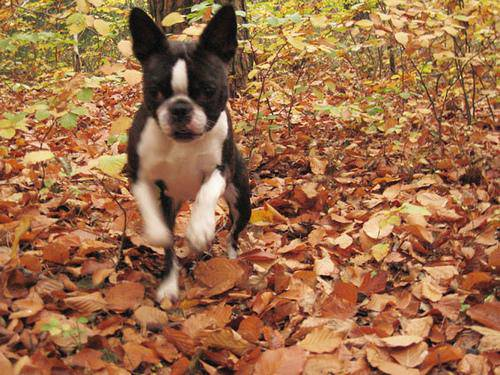

In [61]:
train_val_set[0][0]

In [62]:
train_val_set[0][1]

0

In [63]:
testset[0]

tensor([[[-0.0902, -0.1216, -0.1294,  ...,  0.0745,  0.0745,  0.0431],
         [-0.0824, -0.1137, -0.1216,  ...,  0.0510,  0.0275,  0.0118],
         [-0.0980, -0.1137, -0.1059,  ..., -0.0510, -0.0353,  0.0745],
         ...,
         [-0.5608, -0.5843, -0.5765,  ...,  0.0667,  0.1765,  0.3804],
         [-0.5686, -0.5608, -0.5451,  ...,  0.0588,  0.2078,  0.4196],
         [-0.5686, -0.5843, -0.5922,  ...,  0.1294,  0.1529,  0.2706]],

        [[-0.0353, -0.0667, -0.0745,  ...,  0.1216,  0.1137,  0.0745],
         [-0.0275, -0.0588, -0.0745,  ...,  0.1373,  0.1059,  0.0824],
         [-0.0196, -0.0510, -0.0588,  ...,  0.0667,  0.0824,  0.1765],
         ...,
         [-0.5294, -0.5529, -0.5608,  ...,  0.1137,  0.2314,  0.4118],
         [-0.5216, -0.5059, -0.5137,  ...,  0.0980,  0.2471,  0.4275],
         [-0.5137, -0.5294, -0.5373,  ...,  0.1529,  0.1686,  0.2706]],

        [[-0.7961, -0.8118, -0.8196,  ..., -0.7412, -0.7412, -0.7725],
         [-0.7882, -0.8039, -0.8118,  ..., -0

In [64]:
train_val_set.label_to_idx

{'boston_bull': 0,
 'dingo': 1,
 'pekinese': 2,
 'bluetick': 3,
 'golden_retriever': 4,
 'bedlington_terrier': 5,
 'borzoi': 6,
 'basenji': 7,
 'scottish_deerhound': 8,
 'shetland_sheepdog': 9,
 'walker_hound': 10,
 'maltese_dog': 11,
 'norfolk_terrier': 12,
 'african_hunting_dog': 13,
 'wire-haired_fox_terrier': 14,
 'redbone': 15,
 'lakeland_terrier': 16,
 'boxer': 17,
 'doberman': 18,
 'otterhound': 19,
 'standard_schnauzer': 20,
 'irish_water_spaniel': 21,
 'black-and-tan_coonhound': 22,
 'cairn': 23,
 'affenpinscher': 24,
 'labrador_retriever': 25,
 'ibizan_hound': 26,
 'english_setter': 27,
 'weimaraner': 28,
 'giant_schnauzer': 29,
 'groenendael': 30,
 'dhole': 31,
 'toy_poodle': 32,
 'border_terrier': 33,
 'tibetan_terrier': 34,
 'norwegian_elkhound': 35,
 'shih-tzu': 36,
 'irish_terrier': 37,
 'kuvasz': 38,
 'german_shepherd': 39,
 'greater_swiss_mountain_dog': 40,
 'basset': 41,
 'australian_terrier': 42,
 'schipperke': 43,
 'rhodesian_ridgeback': 44,
 'irish_setter': 45,
 'a

In [65]:
len(train_val_set), len(testset)

(10222, 10357)

### <Font color = 'indianred'>**Create Train/Val split**

In [66]:
def split_dataset(base_dataset, fraction, seed):
    split_a_size = int(fraction * len(base_dataset))
    split_b_size = len(base_dataset) - split_a_size

    return torch.utils.data.random_split(
        base_dataset,
        [split_a_size, split_b_size],
        generator=torch.Generator().manual_seed(seed)
    )

In [67]:
trainset, validset = split_dataset(train_val_set, 0.8, 42)

In [95]:
trainset[0]

(PILImage mode=RGB size=500x375, 33)

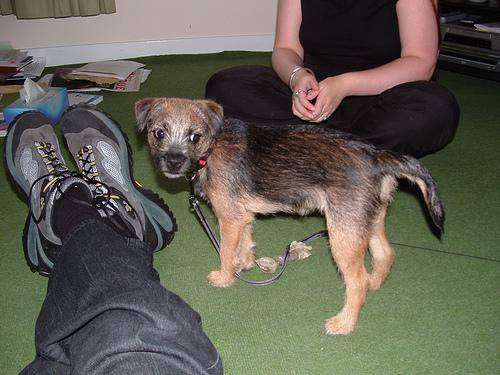

In [94]:
trainset[0][0]

In [96]:
validset[0]

(PILImage mode=RGB size=500x375, 85)

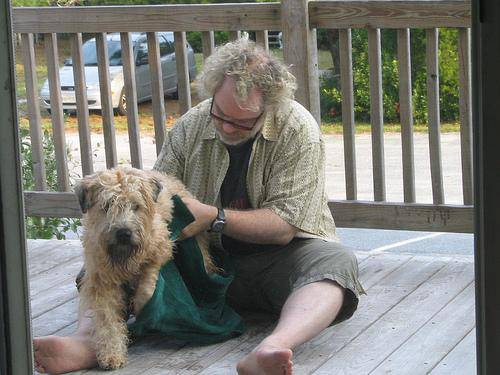

In [69]:
validset[0][0]

### <Font color = 'indianred'>**Create Dataset Class for Subset transformation**

In [70]:
class TransformedSubset(Dataset):
    """
    A Dataset wrapper that applies a transform to a subset of a dataset.

    Attributes:
    subset (Dataset): The subset of data to which the transform will be applied.
    transform (callable, optional): A function/transform to apply to the images.
    """

    def __init__(self, subset, transform=None):
        self.subset = subset  # The original data subset
        self.transform = transform  # The transform function to apply on the data

    def __getitem__(self, index):
        """
        Retrieve and optionally transform the item (image, label) at the given index.

        Parameters:
        index (int): Index of the item to retrieve.

        Returns:
        tuple: Transformed image and label pair.
        """
        # Retrieve original data
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

<Font color = 'indianred'>**The `TransformedSubset` class is essentially a wrapper around a given `Dataset` object, allowing for the application of a specified transform only to a subset of that dataset.**</font> It also inherits from PyTorch's `Dataset` class. Here's a detailed explanation of its components:

### Initialization (`__init__`):
1. **Attributes and Parameters**:
    - `subset`: The original dataset or a subset thereof.
    - `transform`: A function or callable to apply transformations to the images.

### Dataset Length (`__len__`):
- It delegates the call to the length method (`__len__`) of the original `subset` object, essentially returning the number of items in the subset.

### Get Item (`__getitem__`):
1. **Retrieve Original Data**:
    - Using the given `index`, it fetches the image (`x`) and label (`y`) from the original `subset`.

2. **Apply Transform**:
    - If a `transform` function has been provided during initialization, this function is applied to the image (`x`).

3. **Return Value**:
    - It returns a tuple containing the (potentially transformed) image and the original label.

In summary, `TransformedSubset` offers a way to apply a specific transformation to only a subset of a dataset without altering the original dataset. This could be useful in scenarios where you want to apply different data augmentations to training, validation, and test subsets of a single dataset.

### <Font color = 'indianred'>**Transformed trainset/validset**

In [71]:
trainset_transformed = TransformedSubset(trainset, data_transforms['train'])
validset_transformed = TransformedSubset(validset, data_transforms['test'])

In [72]:
trainset_transformed[0]

(tensor([[[ 0.3725,  0.3725,  0.3569,  ..., -0.8431, -0.8431, -0.8510],
          [ 0.3725,  0.3725,  0.3569,  ..., -0.8431, -0.8431, -0.8510],
          [ 0.3725,  0.3725,  0.3647,  ..., -0.8431, -0.8431, -0.8510],
          ...,
          [-0.6392, -0.6078, -0.6314,  ...,  0.0902, -0.0039, -0.0431],
          [-0.6157, -0.5765, -0.6078,  ...,  0.2549, -0.0275,  0.0275],
          [-0.6471, -0.6000, -0.6314,  ...,  0.3176,  0.1765,  0.0588]],
 
         [[ 0.2784,  0.2784,  0.2627,  ..., -0.8588, -0.8588, -0.8667],
          [ 0.2784,  0.2784,  0.2627,  ..., -0.8588, -0.8588, -0.8667],
          [ 0.2784,  0.2784,  0.2706,  ..., -0.8588, -0.8588, -0.8667],
          ...,
          [-0.6471, -0.6157, -0.6392,  ..., -0.1529, -0.2392, -0.2784],
          [-0.6235, -0.5843, -0.6157,  ...,  0.0039, -0.2784, -0.2235],
          [-0.6549, -0.6078, -0.6392,  ...,  0.0667, -0.0745, -0.1922]],
 
         [[ 0.2784,  0.2784,  0.2627,  ..., -0.8353, -0.8353, -0.8431],
          [ 0.2784,  0.2784,

In [73]:
validset_transformed[0]

(tensor([[[ 0.9529,  0.9137,  0.8980,  ...,  0.2863, -0.0824, -0.5059],
          [ 0.9608,  0.9216,  0.8980,  ...,  0.2941, -0.0353, -0.4118],
          [ 0.9765,  0.9294,  0.8745,  ...,  0.2941,  0.0353, -0.3333],
          ...,
          [-0.1529, -0.3255, -0.5216,  ...,  0.3647,  0.3647,  0.3961],
          [-0.2000, -0.3490, -0.5451,  ...,  0.4588,  0.4745,  0.4824],
          [-0.2471, -0.3333, -0.5137,  ...,  0.5529,  0.5529,  0.5137]],
 
         [[ 0.9451,  0.8902,  0.8745,  ...,  0.3333,  0.0196, -0.3804],
          [ 0.9373,  0.8902,  0.8745,  ...,  0.3412,  0.0667, -0.2863],
          [ 0.9373,  0.8902,  0.8431,  ...,  0.3490,  0.1373, -0.2000],
          ...,
          [-0.2392, -0.3961, -0.5686,  ...,  0.3882,  0.3882,  0.4196],
          [-0.2863, -0.4196, -0.5922,  ...,  0.4824,  0.4980,  0.5059],
          [-0.3412, -0.4039, -0.5608,  ...,  0.5765,  0.5765,  0.5373]],
 
         [[ 0.9137,  0.8275,  0.7569,  ...,  0.3333, -0.1137, -0.6392],
          [ 0.9216,  0.8275,

## <Font color = 'indianred'>**Visualize the Data**

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def show_images(images, rows=10, figsize=(10, 10), mean=0.5, std=0.5):
    """
    Creates and displays a grid of images using matplotlib.

    Parameters:
    - images (torch.Tensor): The images to display in grid format.
    - rows (int): Number of rows in the grid.
    - figsize (tuple): Dimensions of the figure for plotting.
    - mean (float): Mean used for unnormalizing the images.
    - std (float): Standard deviation used for unnormalizing the images.

    """
    # Unnormalize the images
    images = images * std + mean

    # Create the grid using torchvision's make_grid utility.
    img_grid = torchvision.utils.make_grid(images,
                                           nrow=rows,      # Number of rows for the grid layout
                                           padding=1,      # Padding between images
                                           pad_value=1)    # Value used for padding

    # Plotting the grid of images.
    plt.figure(figsize=figsize)
    plt.axis("off")  # Turn off axis
    plt.imshow(np.transpose(img_grid, (1, 2, 0)))  # Transpose tensor dimensions for display
    plt.show()  # Display the figure

The `show_images` function takes a batch of images as a tensor and displays them in a grid using matplotlib. The function has some additional parameters for customization, such as the number of rows in the grid (`rows`), the figure size (`figsize`), and the mean and standard deviation (`mean`, `std`) for unnormalizing the images. Here's a breakdown of its key functionalities:

### Unnormalizing the Images:
- The images are unnormalized using the given `mean` and `std` values. This is important if the original images were normalized as a preprocessing step before training a model.

### Creating the Image Grid:
- `torchvision.utils.make_grid` is used to create a grid layout of images.
- `nrow` specifies the number of rows in the grid.
- `padding` and `pad_value` specify the space between images and the value used for this padding, respectively.

### Plotting:
- A matplotlib figure of specified dimensions (`figsize`) is created.
- The axis is turned off for a cleaner display.

### Transposing the Tensor:
- The tensor's dimensions are transposed using `np.transpose(img_grid, (1, 2, 0))`.
- This is done because the output tensor from `make_grid` has the shape `(C, H, W)`, where `C` is the number of color channels, and `H` and `W` are the height and width, respectively.
- Matplotlib's `imshow` expects the input array shape to be `(H, W, C)`. So, transposing is needed to rearrange the dimensions into the format expected by `imshow`.

Finally, the `plt.show()` method is called to display the grid of images.

torch.Size([50, 3, 267, 200])
torch.Size([50, 3, 267, 200])


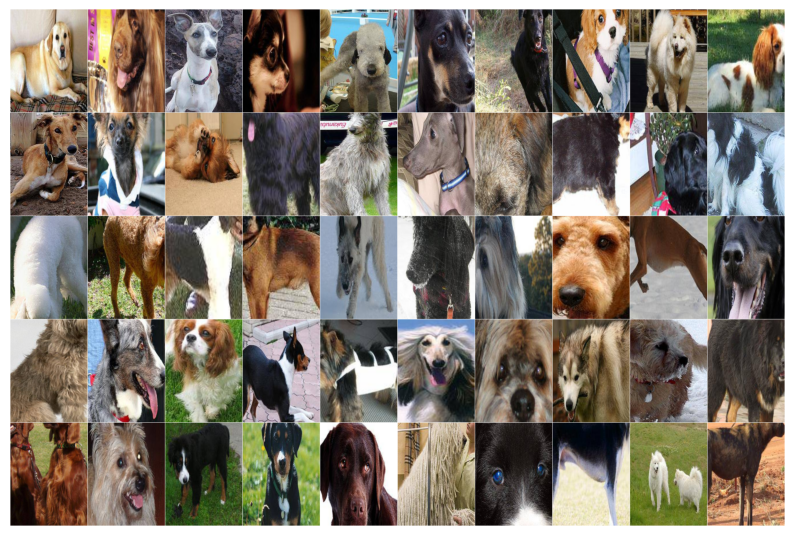

In [75]:
# Generate random indices to select a subset of 50 images from the training set.
samples = torch.randperm(len(validset))[:50]

# Use the generated indices to select images.
# Stack the selected images and permute dimensions for display.
# Note: `.permute(1,0,2,3)` rearranges the tensor dimensions for grid plotting.
images_list = [validset_transformed[i][0] for i in samples]
images_selected = torch.stack(images_list)
print(images_selected.shape)


# Print the shape of the selected images tensor to validate its dimensions.
print(images_selected.shape)

# Display the selected images using the custom 'show_images' function.
show_images(images_selected)


## <Font color = 'indianred'>**Create DataLoaders**

In [76]:
train_loader = torch.utils.data.DataLoader(trainset_transformed, batch_size=256, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validset_transformed, batch_size=256, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

## <Font color = 'indianred'>**Check DataLoaders**

In [77]:
def check_loader(loader):
    """
    Inspects the first few batches from a DataLoader object to report shapes and optionally labels.

    Parameters:
    loader (torch.utils.data.DataLoader): The DataLoader to inspect.
    """
    num_epochs = 1  # Only going through one epoch for this check
    has_labels = None  # Initialize variable to store whether the dataset has labels or not

    for epoch in range(num_epochs):  # Loop through epochs (just one in this case)

        # Loop through mini-batches
        for idx, batch in enumerate(loader):
            if idx >= 3:  # Stop after checking 3 batches
                break

            # Determine if the dataset has labels based on the length of the returned tuple
            if len(batch) == 2:
                has_labels = True  # The dataset has labels
                image, label = batch  # Unpack batch into images and labels
            else:
                has_labels = False  # The dataset has no labels
                image = batch[0]  # Only images are in the batch

            # Print shape information for the images and optionally labels
            if has_labels:
                print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape} | y shape: {label.shape}")
            else:
                print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape}")

    # After the loop, print labels if available
    if has_labels:
        print(f"\nLabels from current batch \n {label}")
    else:
        print("\nNo labels in this dataset.")



The `check_loader` function is designed to inspect the first few batches of data from a PyTorch DataLoader object. It reports the shapes of the tensors and optionally prints labels if available. The function is particularly useful for debugging and validating the DataLoader's behavior. Below are the key components:

### Loop Over Epochs and Mini-Batches:
- The outer loop runs through epochs, but it is essentially just a single epoch (`num_epochs = 1`) because the function is designed to inspect rather than train.
- The inner loop goes through each mini-batch provided by the DataLoader (`loader`).

### Early Stopping:
- The function only looks at the first three batches (`if idx >= 3: break`) to provide a quick snapshot.

### Checking for Labels:
- It determines whether labels are present by examining the length of the returned tuple from the DataLoader (`batch`).
- If the length is 2, it assumes the DataLoader is returning both images and labels; otherwise, it assumes only images are being returned.

### Reporting Shapes:
- It prints the batch number, the batch size, and the shapes of the image and label tensors.
- If labels are present, it additionally prints the shape of the label tensor (`y shape: {label.shape}`).

### Print Labels of Last Checked Batch:
- After inspecting the first few batches, it prints the labels from the last checked batch if available.

In summary, `check_loader` provides a quick and straightforward way to inspect the basic properties (shapes, labels, etc.) of data coming out of a DataLoader.

In [78]:
check_loader(train_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([  3, 111,  12,  57,   8, 103,  75,  23,   4,  54,   4,  29,  94,  26,
         17,  42,  64,  99,  54,  51,  40,  42,  50,  11, 106,  40,  90, 102,
         24,  69,   0,   5, 114,  11,  53,  65,  26,  34,  51,  21,  22,  22,
          8,   3,  76,  74,  87,  83, 112, 106,  41, 110,  88, 104, 105,  37,
         82,  26,  26,  79, 103,  19,  77, 106,  25,  16, 112, 108,  19,  71,
          8, 113,  26,  97,  36, 102,  11,  32, 116,  23,  99,  54,  24,  54,
         96,  97,  61,  61,  96,  59, 101,  51,  92,  54, 113,  56,  78,  12,
         89,  18,  21,  38,   7,  12,   7, 111,   7,  11,   2,  21,  12,  59,
         71, 102,  22,  73,  

In [79]:
check_loader(valid_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 267, 200]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([ 46,  89,  99,  65, 111,  88,   3,  25,  21,  82,  61,  88,  14,  14,
         33,  15,  14,  32,  36,  26,  44,  35, 112,  24,  59,   8,  74,  55,
         77,  17, 116,  54,  68,  72,  97, 115,  65,  62,  11,  75,  43,  47,
        116,  82,  85,  50, 112,  71,  72,   3,  19,  72,  17,   8,  77,   9,
         88,   6,  27,  18,   6,  88,   7,  60, 101,  24, 110,  74,  99, 103,
         35, 111,  10,  98,  40,  48,   2,  26,  53, 117,   6,  68,  48,  34,
         91, 119,  78,  71,  90,  80,  88,  54,  58,  99,  15,  12,  83,   7,
         64,   1,  14, 105,  49,   4,  53,  80, 105,  55, 101,  30, 101,   2,
         41,   0, 113,  37,  

In [80]:
check_loader(test_loader)

 Batch Number: 1 | Batch size: 3 | x shape: torch.Size([3, 267, 200])
 Batch Number: 2 | Batch size: 3 | x shape: torch.Size([3, 267, 200])
 Batch Number: 3 | Batch size: 3 | x shape: torch.Size([3, 267, 200])

No labels in this dataset.


## <Font color = 'indianred'>**Check Transformations**

- Check if transformation are working correctly.
- The transformations are applied at the time of calling dataloader

In [81]:
# check imputs and outputs
for input, target in train_loader:
  print(f'shape of inputs is :{input.shape}')
  print(f'\nmax input value  :{input.max()}')
  print(f'\nmin input value  :{input.min()}')
  print(f'\nmean input value  :{input.mean()}')
  print(f'\nstd input value  :{input.std()}')
  print(f'\nshape of targets is :{target.shape}')
  print(f'\ninputs  :{input[0, 0, 5:10, 5:10]}')

  break

shape of inputs is :torch.Size([256, 3, 267, 200])

max input value  :1.0

min input value  :-1.0

mean input value  :-0.15168429911136627

std input value  :0.5138874650001526

shape of targets is :torch.Size([256])

inputs  :tensor([[-0.4902, -0.6157, -0.5294, -0.4588, -0.3569],
        [-0.4667, -0.5686, -0.5137, -0.4118, -0.3255],
        [-0.4902, -0.5137, -0.4980, -0.3569, -0.2941],
        [-0.5529, -0.4902, -0.4745, -0.3412, -0.3647],
        [-0.5373, -0.4275, -0.3412, -0.2706, -0.2784]])


In [82]:
# Define a function to check the distribution of labels in a DataLoader.
# This function is useful for verifying that the data is balanced across classes.

def check_label_dist(loader):
    """
    Check and display the distribution of labels in a DataLoader.

    Args:
        loader (torch.utils.data.DataLoader): The DataLoader containing batches of data.

    Returns:
        None
    """
    # Initialize a Counter object to store the counts of each label.
    label_counter = Counter()

    # Loop through batches of data from the DataLoader.
    for images, labels in loader:
        # Update the label counter with the list of labels from the current batch.
        label_counter.update(labels.tolist())

    # Print the sorted distribution of labels.
    print("\n Label distribution:")
    return sorted(label_counter.items())


In [83]:
train_labels = check_label_dist(train_loader)


 Label distribution:


In [84]:
df_train_labels = pd.DataFrame(train_labels, columns=['label', 'frequency'])

In [85]:
len(df_train_labels)

120

In [86]:
df_train_labels

,label,frequency
0,0,69
1,1,60
2,2,58
3,3,64
4,4,49
...,...,...
115,115,67
116,116,50
117,117,62
118,118,66


<Axes: >

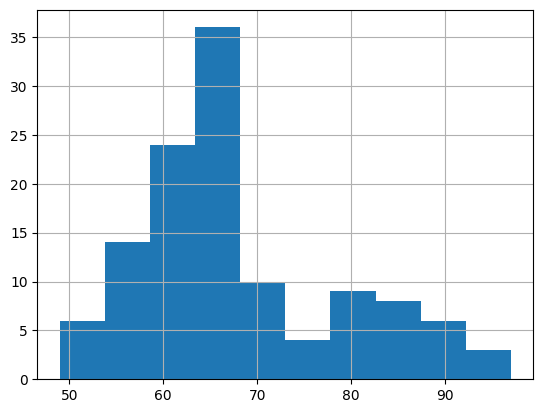

In [87]:
df_train_labels['frequency'].hist()

In [88]:
valid_labels = check_label_dist(valid_loader)


 Label distribution:


In [89]:
df_valid_labels = pd.DataFrame(valid_labels, columns=['label', 'frequency'])

In [90]:
len(df_valid_labels)

120

In [91]:
df_valid_labels

,label,frequency
0,0,18
1,1,20
2,2,17
3,3,21
4,4,18
...,...,...
115,115,19
116,116,19
117,117,13
118,118,8


<Axes: >

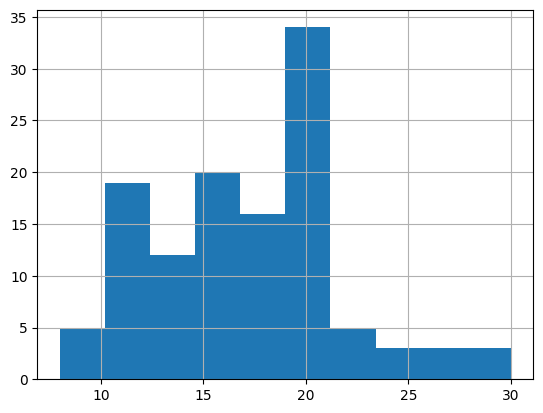

In [92]:
df_valid_labels['frequency'].hist()